<a href="https://colab.research.google.com/github/effepivi/gvxr-tutorials/blob/main/Noise-CBCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 8

## Demo to showcase the result of the integration between ![gVXR](https://github.com/effepivi/gvxr-tutorials/blob/main/img/gvxr_logo.png?raw=1) and ![CIL](https://ccpi.ac.uk/wp-content/uploads/2022/11/CIL-logo-RGB.svg) that we developed during the *CIL Training and Bring Your Own Data User Hackathon* at Cambridge University.
## Author: Franck Vidal

(version 1.1, 1 Nov 2023)

# Aims of this session

1. Simulate a CBCT scan acquisition using gVXR;
2. Add Poisson noise corresponding to a given number of photons per pixel; and
3. Reconstruct the CT volume using the [Core Imaging Library (CIL)](https://ccpi.ac.uk/cil/).


In our simulation the source-to-object distance (SOD) is 1000mm, and the source-to-detector distance (SDD) is 1125mm. The beam spectrum is polychromatic. The voltage is 85 kV. The filtration is 0.1 mm of copper and 1 mm of aluminium. The energy response of the detector is considered. It mimics a 600-micron thick CsI scintillator. 15,000 photons per pixels are used. 600 projections of 512x512 pixels are taken.

![Main parameters of the simulation](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/pediatric-setup.png?raw=1)



# Main steps

1. Download the phantom data. Anthropomorphic data is used. It corresponds to a 5-year old boy.

2. Extract surface meshes from the voxelied phantom.

3. Simulate an X-ray projection of a Welsh dragon made of quartz

![Simulation of an X-ray projection of a Welsh dragon made of quartz](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/visualisation.png?raw=1)

4. Select the number of incident photons per pixel

5. Add the corresponding amount of Photonic noise

![X-ray projection with Poisson noise](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/noisy-projection.png?raw=1)

6. Simulate a CT scan

![Scanning eometry](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/CT-geometry.png?raw=12)

7. Create the flat-field images with the corresponding amount of Photonic noise

![Average flat-field image with Poisson noise](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/average-flat-field.png?raw=1)

8. Reconstruct the CT volume using the [Core Imaging Library (CIL)](https://ccpi.ac.uk/cil/)

![Visualisation of the reconstructed 3D volume](https://github.com/effepivi/gvxr-tutorials/blob/main/Noise-CBCT/plotCT.png?raw=1)

In [1]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [2]:
if IN_COLAB:
    !pip install -q condacolab
    import condacolab
    condacolab.install()

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:19
🔁 Restarting kernel...


In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules

In [2]:
if IN_COLAB:
    !conda config --add channels intel
    !conda config --add channels astra-toolbox
    !conda config --add channels ccpi

In [3]:
if IN_COLAB:
    from google.colab import output
    output.enable_custom_widget_manager()

    from google.colab import drive
    drive.mount('/content/drive')

    !pip install -q --force-reinstall "/content/drive/MyDrive/Colab Notebooks/gvxr-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"
else:
    !pip install -q gvxr

Mounted at /content/drive


# Install ipympl, gVXR, k3D, imagecodecs, xpecgen, spekpy, SimpleITK and VTK

Run the cell below.

<!-- ```python
!pip3 install -q ipympl gvxr k3d imagecodecs xpecgen git+https://bitbucket.org/spekpy/spekpy_release.git SimpleITK vtk
``` -->

In [14]:
if IN_COLAB:

    # !mamba install vtk --quiet
    !mamba install ipympl --quiet
    !mamba install k3d --quiet
    !mamba install imagecodecs --quiet
    !mamba install SimpleITK --quiet

Could not solve for environment specs
The following package could not be installed
└─ xpecgen   does not exist (perhaps a typo or a missing channel).
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done
/usr/local/lib/python3.10/site-packages/conda_package_streaming/package_streaming.py:19: UserWarning: zstandard could not be imported. Running without .conda support.
  warnings.warn("zstandard could not be imported. Running without .conda support.")
/usr/local/lib/python3.10/site-packages/conda_package_handling/api.py:29: UserWarning: Install zstandard Python bindings for .conda support
  _warnings.warn("Install zstandard Python bindings for .conda support")
/usr/local/lib/python3.10/site-packages/conda_package_streaming/package_streaming.py:19: UserWarning: zstandard could not be imported. Running without .conda support.
  warnings.warn("zstandard could not be imported. Running without .conda support.")
/usr/loca

In [17]:
if IN_COLAB:

    !pip3 install -q gvxr
    !pip3 install -q xpecgen
    !pip3 install -q git+https://bitbucket.org/spekpy/spekpy_release.git
    !pip3 install -q vtk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 MB 6.4 MB/s eta 0:00:00


# Install Tigre, ASTRA and CIL

Run the cell below.

<!-- ```python
!pip3 install -q gvxr k3d imagecodecs xpecgen git+https://bitbucket.org/spekpy/spekpy_release.git SimpleITK vtk
``` -->

In [6]:
if IN_COLAB:
    !mamba install cil numpy astra-toolbox --quiet

Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... By downloading and using the CUDA Toolkit conda packages, you accept the terms and conditions of the CUDA End User License Agreement (EULA): https://docs.nvidia.com/cuda/eula/index.html

done


In [18]:
%matplotlib widget

The working directory is not necessary the path of the Notebook on my Mac. The line below enables us to locate the path of the notebbok. This is useful to save output files.

In [19]:
root_path = str(globals()['_dh'][0])

# Copy files

This step is needed when the notebook is executed using Goggle Collaborative

In [20]:
# For Google Collab
import os
import urllib.request

def createDirectory(directory):
    # The directory does not exist
    if not os.path.exists(os.path.abspath(directory)):

        # Create the directory
        os.mkdir(os.path.abspath(directory))

def downloadFile(fname):
    if not os.path.exists(fname):
        base_url = "https://github.com/effepivi/gvxr-tutorials/raw/main"
        url = base_url + "/" + fname
        print("Download the polygon mesh (%s)" % fname)
        urllib.request.urlretrieve(url, fname)

createDirectory(root_path + "/JSON")
createDirectory(root_path + "/Noise-CBCT")
createDirectory(root_path + "/Noise-CBCT/meshes")

downloadFile("sitk2vtk.py")
downloadFile("JSON2gVXRDataReader.py")
downloadFile("JSON/Noise-CBCT.json")
downloadFile("energyResponseDetector.txt")
downloadFile("Noise-CBCT/spectrum85kV.txt")
downloadFile("Noise-CBCT/labels.dat")
downloadFile("Noise-CBCT/visualisation.png")
downloadFile("Noise-CBCT/CT-geometry.png")

Download the polygon mesh (sitk2vtk.py)
Download the polygon mesh (JSON2gVXRDataReader.py)
Download the polygon mesh (JSON/Noise-CBCT.json)
Download the polygon mesh (energyResponseDetector.txt)
Download the polygon mesh (Noise-CBCT/spectrum85kV.txt)
Download the polygon mesh (Noise-CBCT/labels.dat)
Download the polygon mesh (Noise-CBCT/visualisation.png)
Download the polygon mesh (Noise-CBCT/CT-geometry.png)


In [21]:
import glob
import zipfile

import pandas as pd

from IPython.display import display
from IPython.display import Image

import matplotlib.pyplot as plt # Plotting
import numpy as np

from tifffile import imread, imwrite

from IPython.display import display
from IPython.display import Image

import SimpleITK as sitk

import matplotlib # To plot images

font = {'family' : 'serif',
         'size'   : 10
       }
matplotlib.rc('font', **font)

# Uncomment the line below to use LaTeX fonts
# matplotlib.rc('text', usetex=True)

from tqdm.contrib import tzip

has_cil = True
try:
    from cil.processors import TransmissionAbsorptionConverter
    from cil.utilities.display import show_geometry, show2D

    # FBP with Tigre or Astra
    from cil.recon import FBP as FBP_recons_cil

    # FDK with Tigre only
    from cil.recon import FDK as FDK_recons_cil # Tigre only

    # Do not use
    # from cil.plugins.astra.processors.FDK_Flexible import FDK_Flexible

    # FBP and FDK with Astra
    # from cil.plugins.astra import FBP as FBP_plugin_astra

    print("CIL detected")
except:
    has_cil = False
    print("CIL not detected")

has_cil_islider = True
try:
    from cil.utilities.jupyter import islicer
except:
    has_cil_islider = False

has_tigre = True
try:
    # FBP and FDK with Tigre
    from cil.plugins.tigre import FBP as FBP_plugin_tigre
    print("Tigre detected")
except:
    has_tigre = False
    print("Tigre not detected")

from ipywidgets import interact
import ipywidgets as widgets

import base64

from gvxrPython3 import gvxr
from gvxrPython3 import json2gvxr
from gvxrPython3.utils import visualise
from gvxrPython3.utils import plotScreenshot
from gvxrPython3.utils import interactPlotPowerLaw # Plot the X-ray image using a Power law look-up table
from gvxrPython3.utils import saveProjections # Plot the X-ray image in linear, log and power law scales
# gvxr.useLogFile()

from sitk2vtk import *

if has_cil:
    from JSON2gVXRDataReader import *

CIL detected
Tigre not detected
SimpleGVXR 2.0.7 (2023-11-02T10:35:14) [Compiler: GNU g++] on Linux
gVirtualXRay core library (gvxr) 2.0.7 (2023-11-02T10:35:13) [Compiler: GNU g++] on Linux


## Initialise GVXR using our JSON file

In [22]:
json_fname = root_path + "/JSON/Noise-CBCT.json"

# MS Windows
if os.name == "nt":
    json2gvxr.initGVXR(json_fname, renderer="EGL")
# MacOS
elif str(os.uname()).find("Darwin") >= 0:
    json2gvxr.initGVXR(json_fname, renderer="OPENGL")
# GNU/Linux
else:
    json2gvxr.initGVXR(json_fname, renderer="EGL")

Create an OpenGL context: 800x450


## Create the output directory

In [23]:
raw_projection_output_dir = os.path.abspath(json2gvxr.getFilePath(json2gvxr.params["Scan"]["OutFolder"]))
print("The raw projections were saved in", raw_projection_output_dir)
createDirectory(raw_projection_output_dir + "/..")
createDirectory(raw_projection_output_dir)

The raw projections were saved in /content/Noise-CBCT/raw_projections


## Load our detector

In [24]:
json2gvxr.initDetector()

Set up the detector
	Detector position: [0.0, -150.0, 0.0, 'mm']
	Detector up vector: [0, 0, -1]
	Number of pixels: [256, 256]
	Detector number of pixels: [256, 256]
	Energy response: ../energyResponseDetector.txt in MeV
	Pixel spacing: [1.953125, 1.953125, 'mm']


In [25]:
number_of_rows = json2gvxr.params["Detector"]["NumberOfPixels"][1]
number_of_cols = json2gvxr.params["Detector"]["NumberOfPixels"][0]

## Load our source properties

In [26]:
json2gvxr.initSourceGeometry()

Set up the beam
	Source position: [0.0, 1000.0, 0.0, 'mm']
	Source shape: PointSource


In [27]:
spectrum, unit_of_energy, energy_set, bin_sets = json2gvxr.initSpectrum(verbose=0)

Text(0.5, 1.0, 'Corresponding spectra')

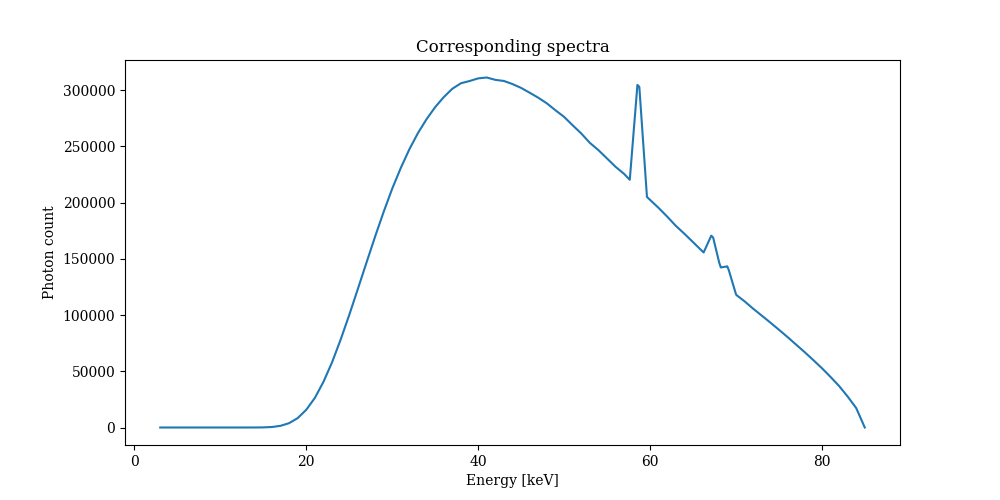

In [28]:
plt.figure(figsize=(10,5))
plt.plot(energy_set, bin_sets)
plt.xlabel("Energy [" + unit_of_energy + "]")
plt.ylabel("Photon count")
plt.title("Corresponding spectra")

## Create the surface meshes

Download and extract the ZIP file.

In [29]:
if not os.path.exists("Noise-CBCT/Pediatric phantom.zip"):
    urllib.request.urlretrieve("https://drive.uca.fr/f/384a08b5f73244cf9ead/?dl=1",
                               root_path + "/Noise-CBCT/Pediatric phantom.zip")

    with zipfile.ZipFile(root_path + "/Noise-CBCT/Pediatric phantom.zip","r") as zip_ref:
        zip_ref.extractall(root_path + "/Noise-CBCT")

Load the phantom

In [30]:
phantom = sitk.ReadImage(root_path + "/Noise-CBCT/Pediatric phantom/Pediatric_model.mhd")

Load the labels

In [31]:
df = pd.read_csv(root_path + "/Noise-CBCT/labels.dat")

Process every structure of the phantom

In [32]:
meshes = []

for threshold, organ in tzip(df["Label"], df["Organs"],
                         desc="Processing anatomy"):

    # Ignore air
    if organ != "Air":

        mesh_fname = root_path + "/Noise-CBCT/meshes/" + organ + ".stl"
        meshes.append(mesh_fname)

        # Only create the mesh if it does not exist
        if not os.path.exists(mesh_fname):

            # Threshold the phantom
            binary_image = (phantom == threshold)

            # Smooth the binary segmentation
            smoothed_binary_image = sitk.AntiAliasBinary(binary_image)

            # Create a VTK image
            vtkimg = sitk2vtk(smoothed_binary_image, centre=True)

            vtk_mesh = extractSurface(vtkimg, 0)
            writeSTL(vtk_mesh, mesh_fname)

Processing anatomy:   0%|          | 0/24 [00:00<?, ?it/s]

In [33]:
del phantom

## Load our samples

In [34]:
json2gvxr.initSamples(root_path + "/JSON/Noise-CBCT.json", verbose=1)

Load the 3D data

	Load Muscle in /content/JSON/../Noise-CBCT/meshes/Muscle.stl using mm
	Load Bone in /content/JSON/../Noise-CBCT/meshes/Bone.stl using mm
	Load Stomach-Interior in /content/JSON/../Noise-CBCT/meshes/Stomach-Interior.stl using mm
	Load Cartilage in /content/JSON/../Noise-CBCT/meshes/Cartilage.stl using mm
	Load Brain in /content/JSON/../Noise-CBCT/meshes/Brain.stl using mm
	Load Bladder in /content/JSON/../Noise-CBCT/meshes/Bladder.stl using mm
	Load Gallbladder in /content/JSON/../Noise-CBCT/meshes/Gallbladder.stl using mm
	Load Heart in /content/JSON/../Noise-CBCT/meshes/Heart.stl using mm
	Load Kidneys-right in /content/JSON/../Noise-CBCT/meshes/Kidneys-right.stl using mm
	Load Kidneys-left in /content/JSON/../Noise-CBCT/meshes/Kidneys-left.stl using mm
	Load Small-Intestine in /content/JSON/../Noise-CBCT/meshes/Small-Intestine.stl using mm
	Load Large-Intestine in /content/JSON/../Noise-CBCT/meshes/Large-Intestine.stl using mm
	Load Liver in /content/JSON/../Noise-

In [35]:
gvxr.moveToCentre()

ID = "root"
min_x, min_y, min_z, max_x, max_y, max_z = gvxr.getNodeAndChildrenBoundingBox(ID, "mm")
centre_x = (min_x + max_x) / 2.0
centre_y = (min_y + max_y) / 2.0
centre_z = (min_z + max_z) / 2.0

print("Bounding box:", [min_x, min_y, min_z], [max_x, max_y, max_z])
print("Bounding box centre:", [centre_x, centre_y, centre_z])

Bounding box: [-172.85147094726562, -174.18807983398438, -300.0243225097656] [172.85147094726562, 174.18809509277344, 300.0243225097656]
Bounding box centre: [0.0, 7.62939453125e-06, 0.0]


## Let's get an x-ray image

We create an X-ray image `projection_in_MeV`.
By default the image is expressed in MeV.
We convert it to keV for display as follows: `projection_in_keV = projection_in_MeV / gvxr.getUnitOfEnergy("keV")`.

In [36]:
projection_in_MeV = np.array(gvxr.computeXRayImage(), dtype=np.single)
projection_in_keV = projection_in_MeV / gvxr.getUnitOfEnergy("keV")

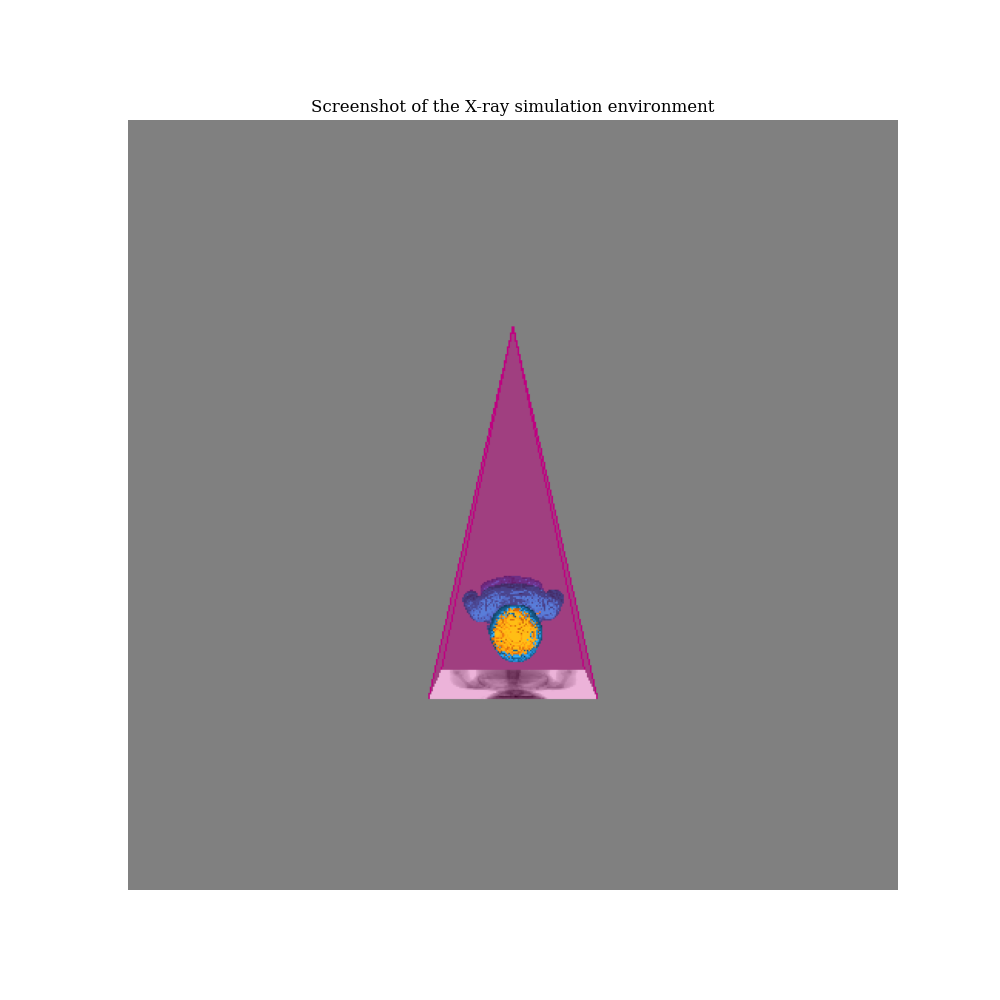

In [37]:
gvxr.setWindowSize(500, 500) # Fix for MacOS
gvxr.displayScene()
plotScreenshot()

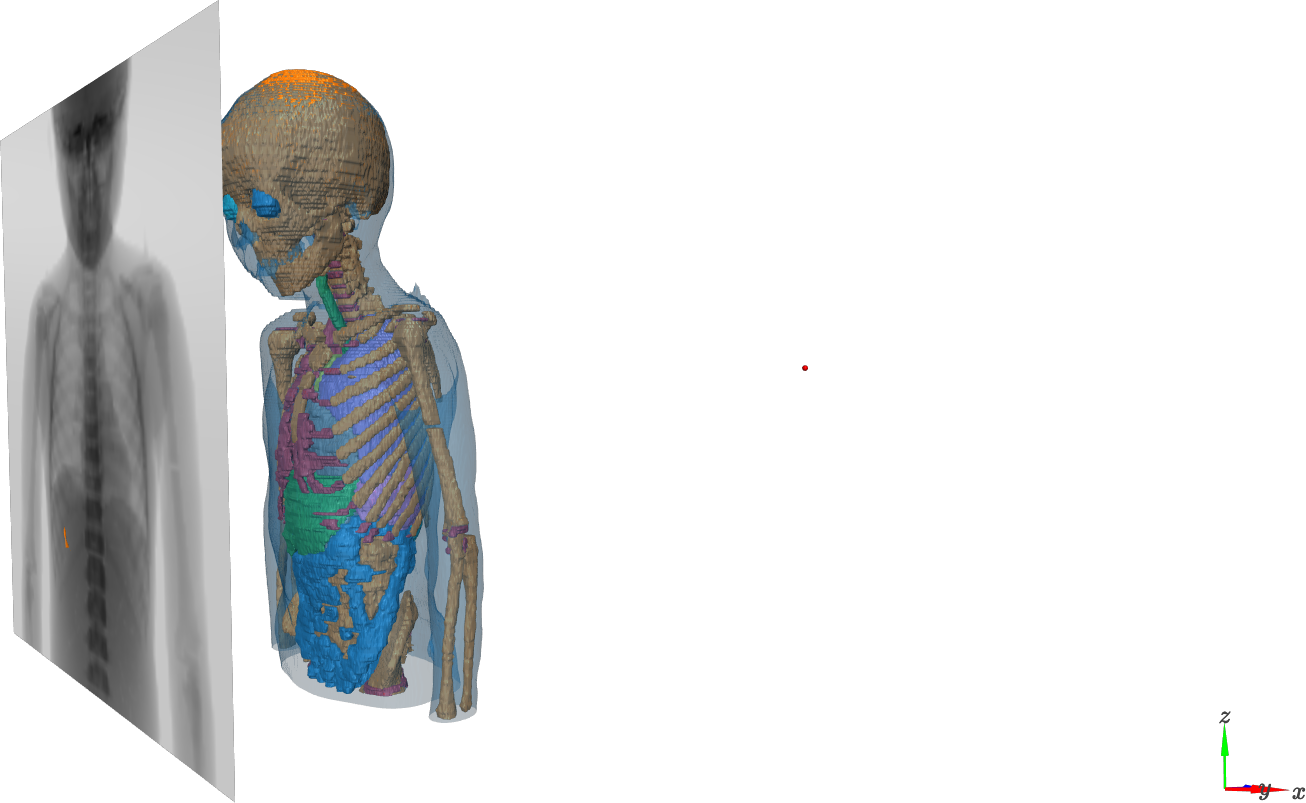

In [38]:
fname = root_path + "/Noise-CBCT/visualisation.png"

if not os.path.exists(fname):

    plot = visualise(use_log=True)
    plot.grid_visible = False

    if IN_COLAB:
        from IPython.display import HTML
        plot.snapshot_type = 'inline'
        HTML(plot.get_snapshot())
    else:
        plot.display()
else:
    display(Image(fname, width=800))

In [39]:
if not os.path.exists(fname):
    if plot is not None:

        plot.fetch_screenshot()

        data = base64.b64decode(plot.screenshot)
        with open(fname,'wb') as fp:
            fp.write(data)

## Add Poisson noise
<!--
1. Load the raw projection in the RAM
2. Convert the image in keV or MeV into number of photons
3. Add the Poisson noise
4. Convert the image in number of photons into keV or MeV
5. Apply the flat-field correction -->

In [40]:
gvxr.enablePoissonNoise()

def getNoisyImage(x_ray_image_energy, target_number_of_photons_per_pixel):
    gvxr.setNumberOfPhotons(target_number_of_photons_per_pixel)
    return np.array(gvxr.computeXRayImage(), dtype=np.single)

In [41]:
fig_plot = None
def chooseNumberOfPhotonsPerPixel(xray_image: np.array, number_of_photons_per_pixel:int=15000, figsize=(10, 5)):

    """
    Use Matplotlib and a Jupyter widget to display the X-ray image with Poisson noise.
    The number of photons per pixel can be change interactively.

    @param xray_image: The image to display
    @number_of_photons_per_pixel: the number of photons per pixel (default: 15000)
    @gamma figsize: the size of the figure (default: (10, 5))
    """

    global target_number_of_photons_per_pixel, fig_plot
    target_number_of_photons_per_pixel = number_of_photons_per_pixel

    noisy_image = getNoisyImage(xray_image, number_of_photons_per_pixel)

    fig_plot = plt.figure(figsize=figsize)
    ax_img = plt.subplot(111)
    img = plt.imshow(noisy_image, cmap="gray")
    # cbar = fig_plot.colorbar(img, orientation='vertical')
    title_str = "Photons per pixels: " + str(number_of_photons_per_pixel)
    ax_img.set_title(title_str)
    plt.tight_layout()
    plt.margins(0,0)

    plt.close()

    ## Callback function: plot y=Acos(x+phi)
    def update_plot(number_of_photons_per_pixel):
        global target_number_of_photons_per_pixel
        target_number_of_photons_per_pixel = number_of_photons_per_pixel
        noisy_image = getNoisyImage(xray_image, number_of_photons_per_pixel)
        img = ax_img.imshow(noisy_image, cmap="gray")
        title_str = "Photons per pixels: " + str(number_of_photons_per_pixel)
        ax_img.set_title(title_str)
        # fig_plot.colorbar(img, cax=cbar.ax, orientation='vertical')

        display(fig_plot)

    interact(update_plot,
             number_of_photons_per_pixel=widgets.IntSlider(value=number_of_photons_per_pixel, min=10, max=50000, step=10, description="Photons/pixels"))

In [42]:
chooseNumberOfPhotonsPerPixel(projection_in_MeV, number_of_photons_per_pixel=15000, figsize=(10, 5))

interactive(children=(IntSlider(value=15000, description='Photons/pixels', max=50000, min=10, step=10), Output…

In [43]:
fig_plot.savefig(root_path + "/Noise-CBCT/noisy-projection.png", dpi=72)

In [44]:
print("Photons per pixels:", target_number_of_photons_per_pixel)

Photons per pixels: 15000


## Flat images

Create the flat field image

In [45]:
white_slider = widgets.IntSlider(value=25, min=1, max=500, step=1, description='Number of flat images:')
white_slider

IntSlider(value=25, description='Number of flat images:', max=500, min=1)

In [46]:
print("Number of flat images:", white_slider.value)
json2gvxr.params["Scan"]["NumberOfWhiteImages"] = white_slider.value

Number of flat images: 25


In [47]:
createDirectory(root_path + "/Noise-CBCT/flat-field")
fname = root_path + "/Noise-CBCT/flat-field/flat.tif"

flats = []

for i in range(white_slider.value):
    flats.append(gvxr.getWhiteImage())

flat_field = np.average(flats, axis=0)

imwrite(fname, flat_field.astype(np.single), compression='zlib')

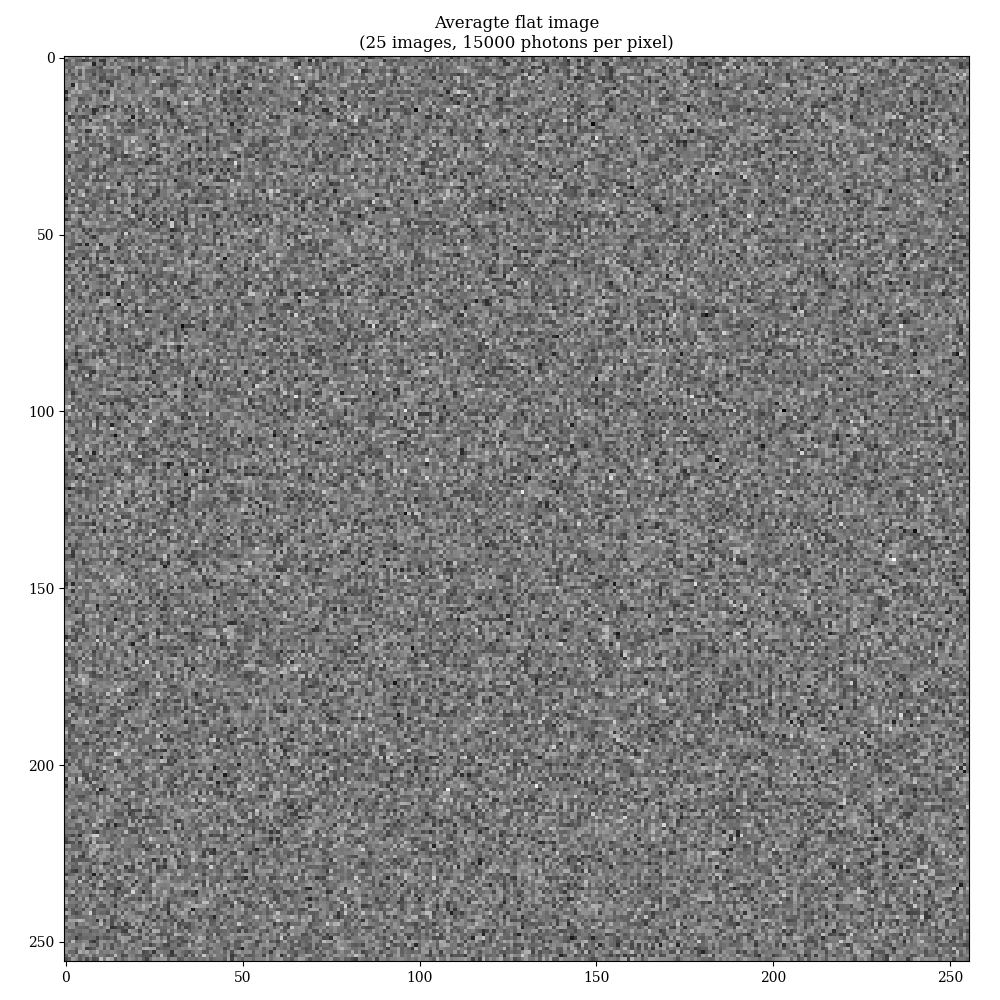

In [48]:
fig = plt.figure(figsize = (10, 10))
plt.title("Averagte flat image\n(" + str(white_slider.value) + " images, " + str(target_number_of_photons_per_pixel) + " photons per pixel)")
img = plt.imshow(flat_field, cmap='gray')
plt.tight_layout()
plt.savefig(root_path + "/Noise-CBCT/average-flat-field.png", dpi=72)

## Perfom the CT scan

In [49]:
angles = json2gvxr.initScan()

Set up the CT Scan


In [ ]:
number_of_angles = json2gvxr.params["Scan"]["NumberOfProjections"]
angles = json2gvxr.doCTScan()

In [ ]:
if json2gvxr.white_image is not None:
    white_image = json2gvxr.white_image
    fname = root_path + "/Noise-CBCT/flat.tif"
    imwrite(fname, flat_field.astype(np.single), compression='zlib')

In [ ]:
print("First angle:", angles[0])
print("Last angle:", angles[-1])
print("Number of angles:", number_of_angles)

## CT reconstruction

In [ ]:
def reconstructFBPWithCIL(data, ig, use_plugins, verbose):
    if verbose > 0: print("Parallel beam detected")


    if has_tigre:
        if verbose > 0: print("Backend: Tigre")
        if verbose > 0: print("Use plugin directly: ", use_plugins)

        if use_plugins:
            reconstruction:ImageData | None = FBP_plugin_tigre(ig,data.geometry)(data)
        else:
            reconstruction:ImageData | None = FBP_recons_cil(data, ig, backend="tigre").run()

    else:
        if verbose > 0: print("Backend: Astra-Toolbox")
        if verbose > 0: print("Use plugin directly: ", use_plugins)

        if use_plugins:
            reconstruction:ImageData | None = FBP_plugin_astra(ig,data.geometry)(data)
        else:
            reconstruction:ImageData | None = FBP_recons_cil(data, ig, backend="astra").run()

    return reconstruction

In [ ]:
def reconstructFDKWithCIL(data, ig, use_plugins, verbose):
    if verbose > 0: print("Cone beam detected")

    # if has_tigre:
    #     if verbose > 0: print("Backend: Tigre")
    #     reconstruction:ImageData | None = FDK(data, ig).run()
    # else:
    #     if verbose > 0: print("Backend: Astra-Toolbox")
    #     fbk = FDK_Flexible(ig, data.geometry)
    #     fbk.set_input(data)
    #     reconstruction:ImageData | None = fbk.get_output()

    if has_tigre:
        if verbose > 0: print("Backend: Tigre")
        if verbose > 0: print("Use plugin directly: ", use_plugins)

        if use_plugins:
            reconstruction:ImageData | None = FBP_plugin_tigre(ig,data.geometry)(data)
        else:
            reconstruction:ImageData | None = FDK_recons_cil(data, ig).run()
    else:
        if verbose > 0: print("Backend: Astra-Toolbox")
        if verbose > 0: print("Use plugin directly: ", use_plugins)

        if use_plugins:
            reconstruction:ImageData | None = FBP_plugin_astra(ig,data.geometry)(data)
        else:
            raise(ValueError("Not implemented for Astra"))
            # reconstruction:ImageData | None = FDK_recons_cil(data, ig).run() # Not implemented for Astra
            reconstruction:ImageData | None = None

    return reconstruction

In [ ]:
def reconstruct(JSON_fname, use_plugin=False, verbose=0):
    import json

    # Opening JSON file
    f = open(JSON_fname)

    # returns JSON object as
    # a dictionary
    json_data = json.load(f)

    data = None
    reconstruction = None

    source_shape = json_data["Source"]["Shape"]

    if verbose > 0:
        print("Source shape:", source_shape)

    # Use CIL
    if has_cil:

        if verbose > 0: print("Use CIL")

        reader = JSON2gVXRDataReader(file_name=JSON_fname)
        data = reader.read()

        print("data.geometry", data.geometry)

        if has_tigre:
            data.reorder(order='tigre')
            # data.geometry.set_angles(-data.geometry.angles)
        else:
            data.reorder("astra")
            # data.geometry.set_angles(-data.geometry.angles)

        ig = data.geometry.get_ImageGeometry()

        data_corr = TransmissionAbsorptionConverter(white_level=data.max(), min_intensity=0.000001)(data)

        if type(source_shape) == str:

            if source_shape.upper() == "PARALLELBEAM" or source_shape.upper() == "PARALLEL":
                reconstruction:ImageData | None = reconstructFBPWithCIL(data_corr, ig, use_plugin, verbose)

            elif source_shape.upper() == "POINTSOURCE" or source_shape.upper() == "POINT" or source_shape.upper() == "CONE" or source_shape.upper() == "CONEBEAM":
                reconstruction:ImageData | None = reconstructFDKWithCIL(data_corr, ig, use_plugin, verbose)

            else:
                raise ValueError("Unknown source shape:" + source_shape)

        elif type(source_shape) == type([]):
            if source_shape[0].upper() == "FOCALSPOT":
                reconstruction:ImageData | None = reconstructFDKWithCIL(data_corr, ig, use_plugin, verbose)

            else:
                raise ValueError("Unknown source shape:" + source_shape)

        else:
            raise ValueError("Unknown source shape:" + source_shape)

    else:
        raise ValueError("CIL is not installed")

    return data, reconstruction

In [ ]:
data, reconstruction = reconstruct(json_fname, False, verbose=1)

In [ ]:
if has_cil:
    fig = show_geometry(data.geometry)
    fig.save(root_path  + "/Noise-CBCT/CT-geometry.png", dpi=72)

In [ ]:
islicer(reconstruction, direction='vertical')

In [ ]:
islicer(reconstruction, direction='horizontal_x')

In [ ]:
fname = root_path  + "/Noise-CBCT/CT_in_mu.mha"

In [ ]:
reconstruction_as_array = reconstruction.as_array()

In [ ]:
detector_size = np.array(gvxr.getDetectorSize("mm"))
number_of_pixels = np.array(gvxr.getDetectorNumberOfPixels())
spacing = detector_size / number_of_pixels

print("CT volume saved in", fname)
sitk_image = sitk.GetImageFromArray(reconstruction_as_array)
sitk_image.SetSpacing([spacing[0], spacing[0], spacing[1]])
sitk.WriteImage(sitk_image, fname, useCompression=True)

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (20, 7))
plt.suptitle("CT reconstruction with noise")
ax1.imshow(reconstruction_as_array[ int(reconstruction_as_array.shape[0] * 0.5), :, :], cmap='gray')
ax2.imshow(reconstruction_as_array[ :, int(reconstruction_as_array.shape[1] * 0.25), :], cmap='gray')
ax3.imshow(reconstruction_as_array[ :, :, int(reconstruction_as_array.shape[2] * 0.5)], cmap='gray')
plt.tight_layout()
plt.savefig(root_path  + "/Noise-CBCT/plotCT.png", dpi=72)
plt.show()

# Cleaning up

Once we have finished it is good practice to clean up the OpenGL contexts and windows with the following command.

In [ ]:
gvxr.terminate()